<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Supplementary material</strong></p>
        <p>To the article by Nagel et al.: Neighbourhood watch in mechanics: non-local models and convolution</p>
    </div>
</div>

# Superposition and convolution: from single loads, to discrete groups of loads, to distributed loads

In [1]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import sympy as sp
from scipy import stats

In [2]:
#HIDDEN
import plot_functions.plot_settings
%run plot_functions/stresses_under_loads_plots.ipynb
%run plot_functions/stresses_steinbrenner_plots.ipynb
%run plot_functions/settlements_plots.ipynb

from matplotlib.colors import SymLogNorm
import warnings
warnings.filterwarnings('ignore')

## Stresses in the elastic half-space as a result of a vertical point load

The elastic domain is homogeneous, behaves linearly elastic and is isotropic in its properties. The self-weight is not taken into account in the formula, so it provides *stress increments* as a result of the point load $F$. According to the superposition principle valid under the mentioned conditions, the initial stresses can later be taken into account by adding them to the stress increments:

\begin{align}
    \sigma_{ij} = \sigma_{ij,0} + \Delta \sigma_{ij}
\end{align}

Centering the Cartesian Coordinates $x,y,z$ ($z$ vertikal) around the point load, we introduce the horizontal radial distance $r$ as well as the total spatial distance $R$ from the point load as

\begin{align}
    r &= \sqrt{x^2 + y^2}
    \
    R &= \sqrt{x^2 + y^2 + z^2}
\end{align}

With the analytical solution of Boussinesq, the following equations for the six independent stress coordinates are obtained (note that the dimensionally significant terms precede the dimensionless bracket expressions):

\begin{align}
    \Delta \sigma_{xx} &= \frac{3F_z}{2\pi R^2} \left[ \frac{x^2 z}{R^3} - \frac{1-2\nu}{3} \left( \frac{(x^2 - y^2) R}{r^2 (R + z)} + \frac{y^2 z}{R r^2}\right) \right]
    \
    \Delta \sigma_{yy} &= \frac{3F_z}{2\pi R^2} \left[ \frac{y^2 z}{R^3} - \frac{1-2\nu}{3} \left( \frac{(y^2 - x^2) R}{r^2 (R + z)} + \frac{x^2 z}{R r^2}\right) \right]
    \
    \Delta \sigma_{zz} &= \frac{3F_z}{2\pi R^2} \frac{z^3}{R^3}
    \
    \Delta \sigma_{xy} &= \frac{3F_z}{2\pi R^2} \left[ \frac{x y z}{R^3} - \frac{1-2\nu}{3} \frac{xy(2R+z)}{R(R+z)^2} \right]
    \
    \Delta \sigma_{yz} &= \frac{3F_z}{2\pi R^2} \frac{yz^2}{R^3}
    \
    \Delta \sigma_{xz} &= \frac{3F_z}{2\pi R^2} \frac{xz^2}{R^3}
\end{align}

We can plot, e.g., the vertical stress increment as a function of $r$ acting at various depths $z$ to observe how the load spreads in the half space due to the action of shear stresses.

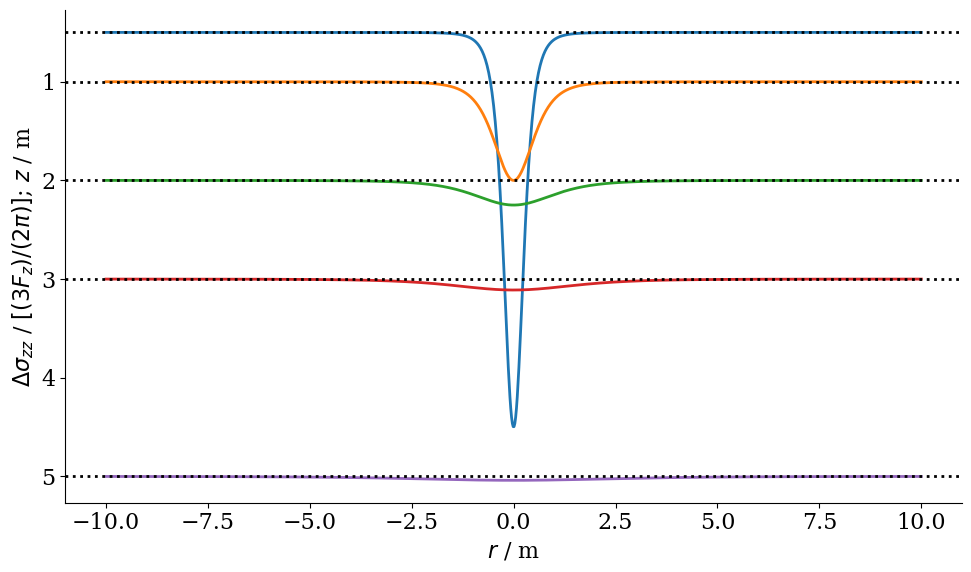

In [3]:
#HIDDEN
plot_szz_Boussinesq_depth()

Another useful way of plotting the result is to look at isobars beneath the point load. The following plot shows isobars for the vertical stress increment $\Delta \sigma_{zz}$ for an arbitrary force of $F_z = 100$ kN.

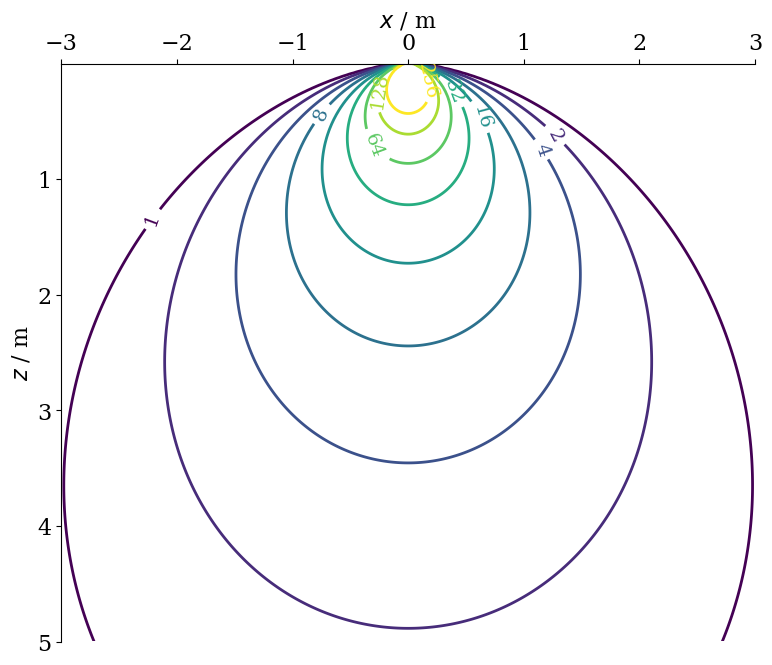

In [4]:
#HIDDEN
plot_isobars_zz_Boussinesq()

Now we obtain settlements using linear elasticity. We depart from the vertical strain and Hooke's law

\begin{align}
    \epsilon_{zz} &= \frac{1}{E} \left[ \Delta \sigma'_{zz} - \nu (\Delta \sigma'_{xx} + \Delta \sigma'_{yy})  \right]
    \
    &= \frac{3F_z}{2\pi R^2 E} \left[ \frac{z^3}{R^3} - \nu \left( \frac{r^2 z}{R^3} - \frac{1-2\nu}{3} \frac{z}{R} \right) \right]
\end{align}

and integrate:

$$
    u_z(r,\bar{z}) = \frac{3F_z}{2\pi E} \int \limits_{\bar{z}}^{\infty} \frac{1}{R^2} \left[ \frac{z^3}{R^3} - \nu \left( \frac{r^2 z}{R^3} - \frac{1-2\nu}{3} \frac{z}{R} \right) \right] \text{d}z
$$

Let's give sympy something to do.

In [5]:
r, z, nu, eps = sp.symbols('r z nu epsilon')
R = sp.sqrt(r**2 + z**2)
eps = 1/R**2 * ((z/R)**3 - nu * (r**2*z/R**3 - (1-2*nu)/3 * z/R))
sp.integrate(eps,(z,z,sp.oo)).simplify()

(-2*nu**2*r**2 - 2*nu**2*z**2 + nu*z**2 + 2*r**2 + 3*z**2)/(3*(r**2 + z**2)**(3/2))

Reformulating (using the third binomial equation) leads to:

\begin{align}
    u_z(r,z) &= \frac{3F_z}{2\pi E} \frac{1}{3R} \left[ 2(1-\nu^2) + \frac{z^2}{R^2} ( 1+\nu) \right]
    \
    &= \frac{F_z}{2\pi E} \frac{1+\nu}{R} \left[ 2(1-\nu) + \frac{z^2}{R^2} \right]
\end{align}

which, using $G = \frac{E}{2(1+\nu)}$ leads to the following expression for the vertical displacements.

$$
    u_z(r,z) = \frac{F_z}{4\pi G R} \left[ 2(1-\nu) + \frac{z^2}{R^2} \right]
$$

Surface settlements finally are given by

$$
    s(r) = u_z(r,z=0) = \frac{F_z(1-\nu)}{2\pi G r}
$$

The singularity at the point of force application is again apparent. The solution looks like this (for $F_z / E = 10^{-3}$):

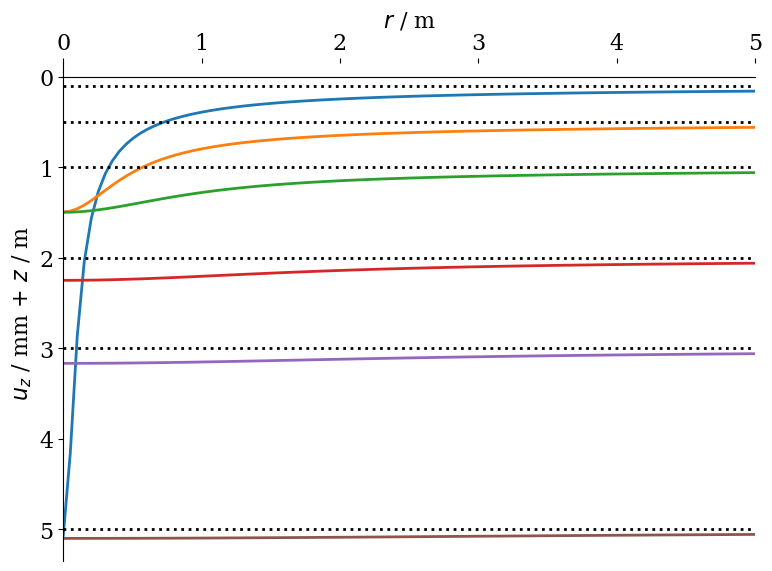

In [6]:
#HIDDEN
plot_settlement_simple()

## Discrete convolution: the superposition of sets of loads

We can now introduce several forces acting next to each other and observe the resulting stress distribution in the plane beneath this set of loads. The following widget allows you to control the number of forces you want to apply along the horizontal distance. The spacing is prescribed by 1 m and each force has a magnitude of 50 kN.

*Note*: The calculation of the result may come with a short delay.

In [7]:
#HIDDEN
interactive_superposition()

interactive(children=(BoundedIntText(value=3, description=r'number of loads', max=10, min=1, style=DescriptionS…

We clearly observe the superposition of the stress field and the smoothing of the distribution at depth with an increasing number of forces. This is equivalent to transitioning from the discrete sum to the integration (from a set of forces to a line-load).

Next, we look at the superposition of the displacement field. Due to the $1/r$ singularity, we start plotting at a depth of $z=0.5$ m. Contours give $u_z$ / mm for the values given above. The grey lines on top indicate the settlement trough at $z=0.5$ m of each individual force, while the red curve is the resulting sum.

In [8]:
#HIDDEN
#%run plot_functions/settlements_plots.ipynb
interactive_superposition_u()

interactive(children=(BoundedIntText(value=3, description=r'number of loads', max=10, min=1, style=DescriptionS…

The superposition is again visible. We also observe the formation of larger settlement troughs as the number of loads increase. Maximum settlements occur in the center of all forces.

## Continuous setting

### Loading without elastic structures ($K = 0$)

We now transition from a set of forces to a load intensity $q$, i.e. a surface pressure. This pressure shall act on a domain with dimensions $(a \times b)$ in $x$ and $y$ (e.g., a rectangular foundation).

We calculate the vertical stress increment at a point $(x,y,z)$ using the following formula:

$$
    \Delta \sigma_{zz}(x,y,z) = \frac{q}{2\pi} \sum \limits_{i=0}^3 (-1)^i \left\{ \left[ \frac{1}{(x+x_i)^2 + z^2} + \frac{1}{(y+y_i)^2 + z^2} \right] \frac{(x+x_i)(y+y_i) z}{R_i} + \arctan \left[ \frac{(x+x_i)(y+y_i)}{z R_i} \right] \right\} \quad \text{with} \quad R_i = \sqrt{(x+x_i)^2 + (y+y_i)^2 + z^2}
$$

Where $x_i$ and $y_i$ are the vertices of the load domain:

\begin{align}
    x_i &= \{-a/2,\ -a/2,\ a/2,\ a/2\} \quad \text{for } i \in [0,3]
    \
    y_i &= \{-b/2,\ b/2,\ b/2,\ -b/2\} \quad \text{for } i \in [0,3]
\end{align}

Note that no elastic constants appear in this formula. In the formulae for the remaining stress coordinates, the Poisson's ratio appears.

The evaluation of this formula results in the following isobar representation along the two vertical symmetry planes of the rectangular load (mid section cuts). The isobar labels indicate the ratio $\Delta \sigma_{zz}/q$.

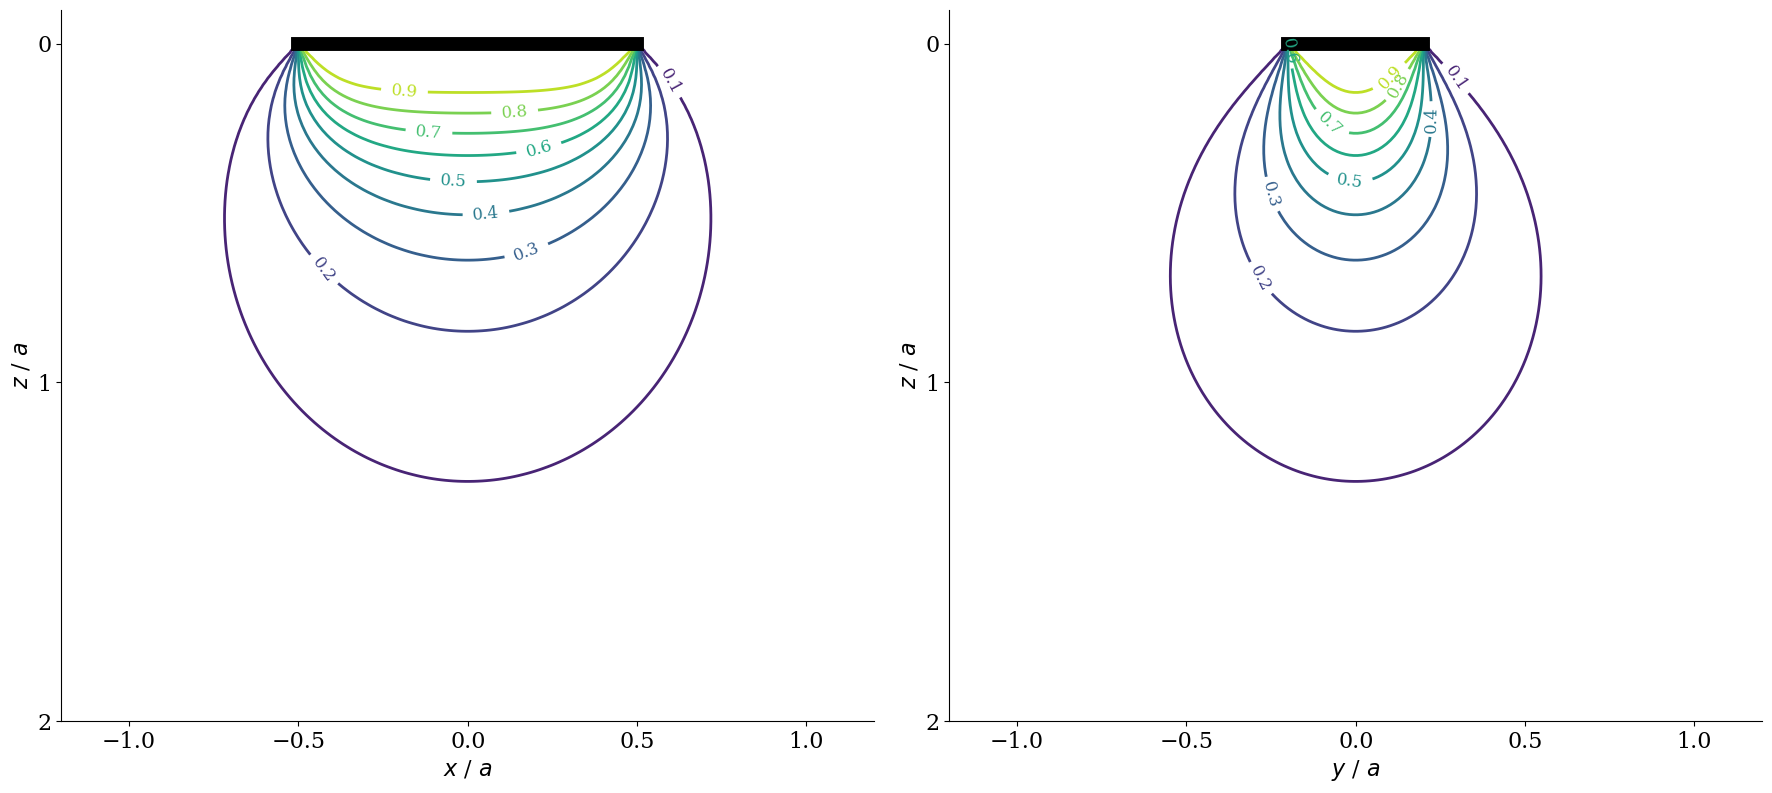

In [9]:
#HIDDEN
plot_isobars_zz()

### Loading by an infinitely stiff plate ($K \rightarrow \infty$)

While the soil pressure on the foundation with $K=0$ (above result) is simply equal to the applied load, i.e. $\sigma_0 = q$, the pressure becomes highly non-linear and singular for an infinitely stiff foundation ($K \rightarrow \infty$):

$$
    \frac{\sigma_0(x,y)}{q} = \frac{4}{\pi^2 \sqrt{\left[1 - 4\left( \frac{x}{a} \right)^2\right]\left[1 - 4\left( \frac{y}{b} \right)^2\right]}}
$$

The following figure shows the distribution, where the red dots mark some characteristic points where $\sigma_0 = q$:

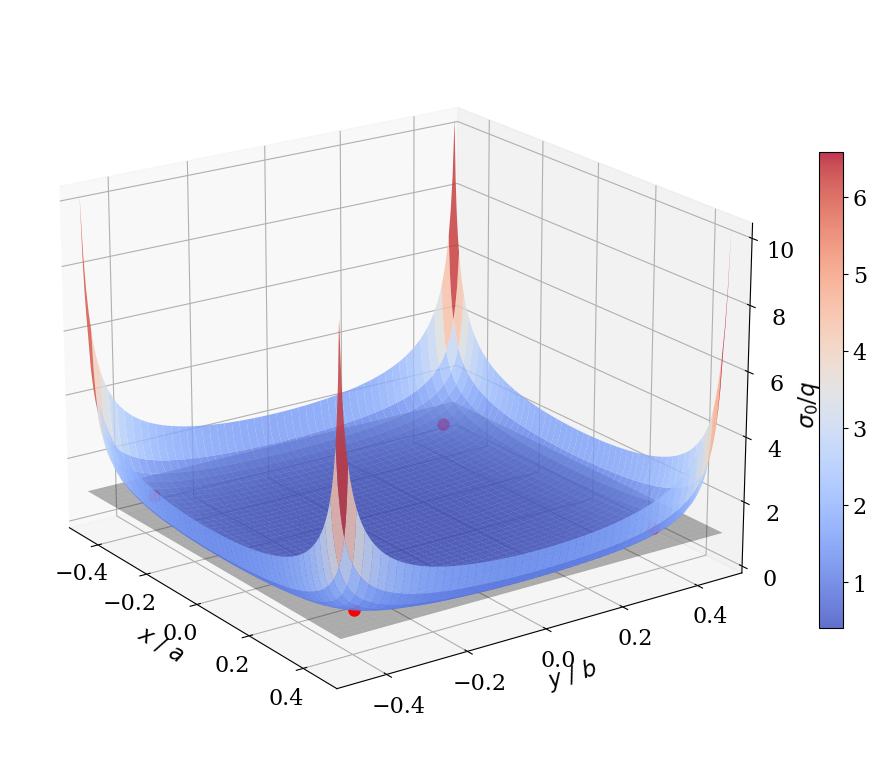

In [10]:
#HIDDEN
plot_char_pt_rect()

### Challenge

What happens now for finite, non-vanishing plate stiffness? The elastic plate takes some load, and so does the elastic half space, with additional constraints on their interaction. The equations can be found in the article. For solving them numerically numpy and scipy may be helpful.